- The titanic and titanic2 data frames describe the survival status of individual passengers on the Titanic.
- The titanic data frame does not contain information from the crew, but it does contain actual ages of half of the passengers. 
- The principal source for data about Titanic passengers is the Encyclopedia Titanica.

In [1]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the Dataset and checking the shape of the dataset
df = pd.read_csv("titanic_train.csv")
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variable Description

- Pclass Passenger Class :- Pclass (1 = 1st; 2 = 2nd; 3 = 3rd)
- survival :- Survival (0 = No; 1 = Yes)
- name :- Passenger Names
- sex :- Sex ["MALE","FEMALE"]
- age :- Age
- sibsp :- Number of Siblings/Spouses Aboard
- parch :- Number of Parents/Children Aboard
- ticket :- Ticket Number
- fare :- Passenger Fare (British pound)
- cabin :- Cabin
- embarked :- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#### EDA

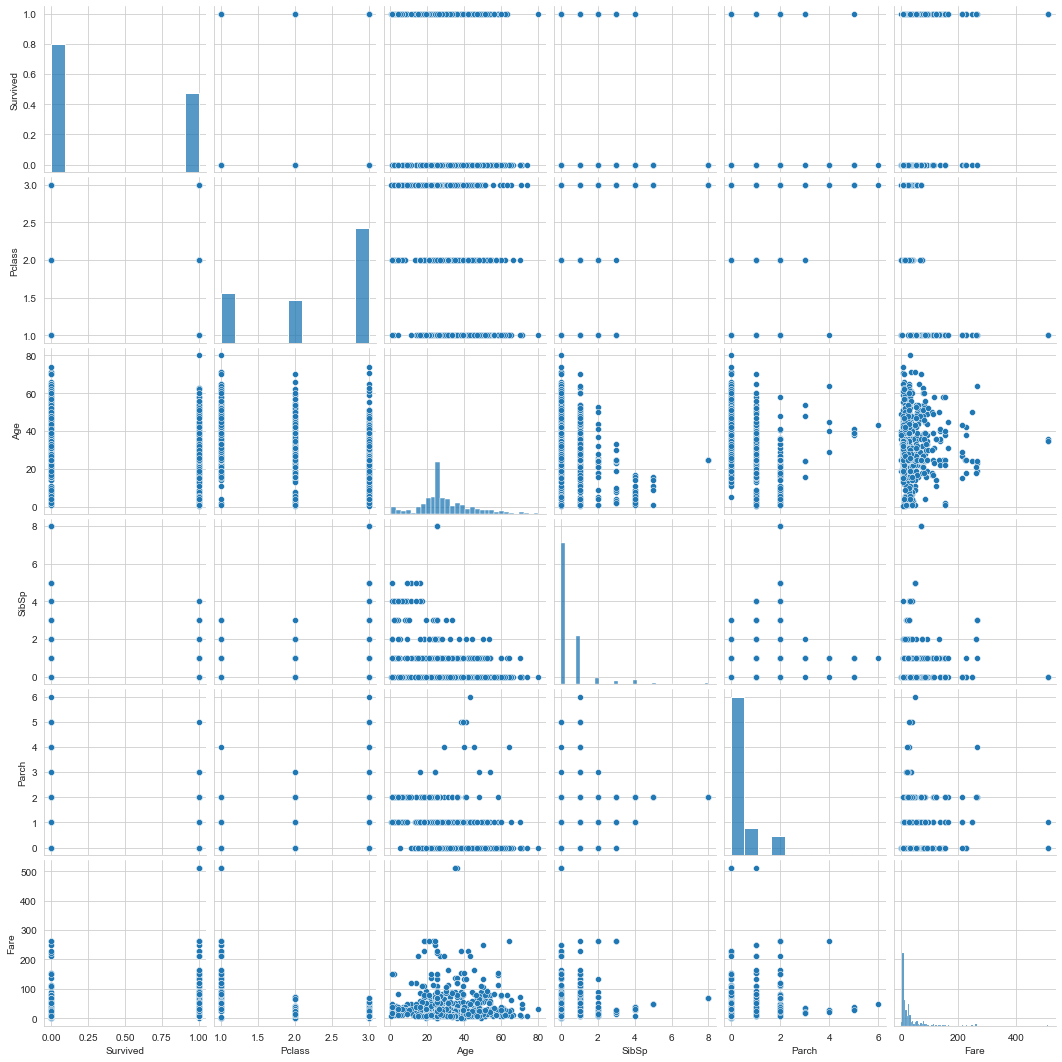

In [110]:
sns.pairplot(df)

In [4]:
#Check basic statistics for each columns:-

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

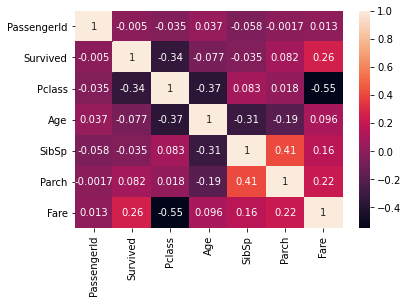

In [6]:
# Correlation between the columns

sns.heatmap(df.corr() , annot=True)

<AxesSubplot:>

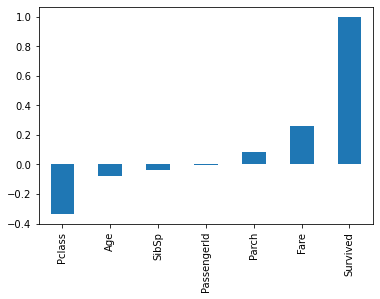

In [7]:
df.corr()["Survived"].sort_values(ascending=True).plot(kind="bar")

In [8]:
# To check there is imblance in DataSet:-

df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

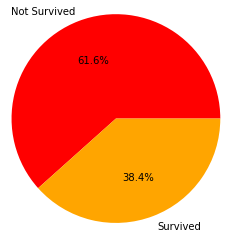

In [9]:
# Pie chart of Survived Column for better visualization :- 
plt.pie(df["Survived"].value_counts() , 
       labels = ["Not Survived","Survived"] ,
       colors= ["red","orange"] , 
       autopct = "%.1f%%",
       radius=1.2)
plt.show()

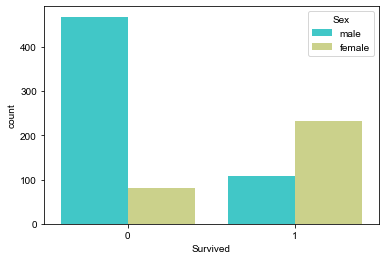

In [10]:
# How many are survived w.r to Sex

sns.countplot("Survived",hue="Sex",data=df,palette="rainbow")
sns.set_style("whitegrid")

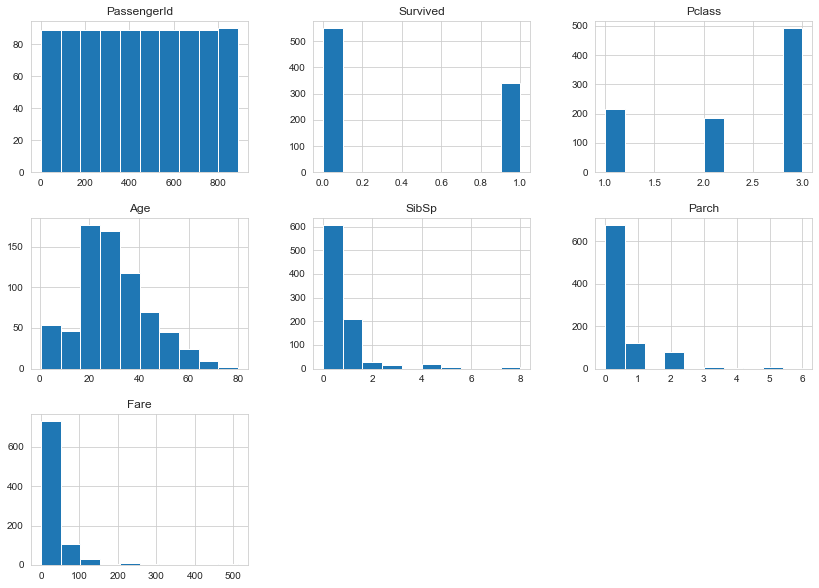

In [11]:
# To check distribution of data and identify outliers:-

df.hist(figsize=(14,10))
plt.show()

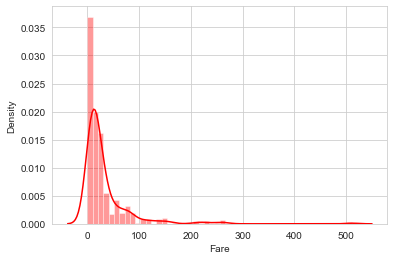

In [12]:
# Distribution of Fare on datset

sns.distplot(df["Fare"],color="red")
sns.set_style("whitegrid")

<AxesSubplot:xlabel='Age', ylabel='Density'>

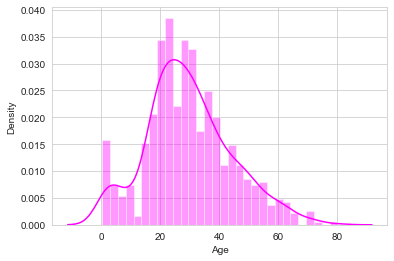

In [13]:
# Distibution of Age groups on dataset

sns.distplot(df["Age"],bins=30,color="magenta")

In [14]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

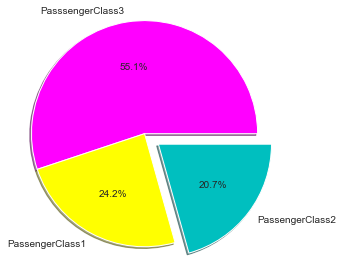

In [15]:
# Pie chart of Pclass Column for better visualization :- 

plt.pie(df["Pclass"].value_counts() , 
       labels = ["PasssengerClass3","PassengerClass1","PassengerClass2"] ,
       colors= ["magenta","yellow","c"] , 
       autopct = "%.1f%%",
       radius=1.3,
       shadow=True,
       explode=(0,0,0.2))
plt.show()

<AxesSubplot:>

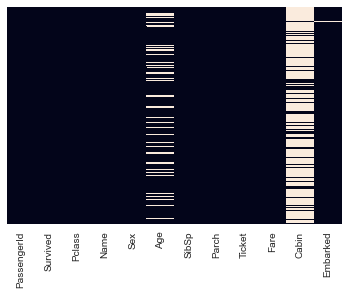

In [16]:
# Checking nan values in the dataset using heatmap for better visualization

sns.heatmap(df.isna() , yticklabels=False,cbar=False)

- If the dataset has more than 50% of null values we will drop that column
- If the dataset has less than 50% of null values we will fill the null values
- If the dataset has less than 5% of null values we will use dropna()

In [17]:
df.drop("Cabin",axis=1,inplace=True)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

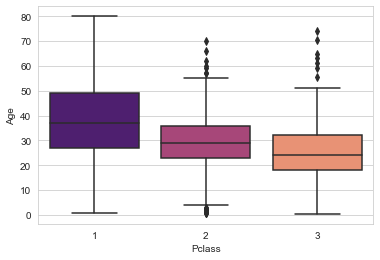

In [19]:
# Checking age w.r to PClass for equally filling the Age values.
# Not just directly applying mean of age and using fillna 

sns.boxplot(df["Pclass"],df["Age"],data=df , palette="magma")

In [20]:
def compute_age(cols):
    age = cols[0]
    pclass = cols[0]
    
    if pd.isna(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 28
        else:
            return 25
    else:
        return age

In [21]:
df["Age"] = df[["Age","Pclass"]].apply(compute_age,axis=1)

In [22]:
# Dropna for Embarked column which has 2-3% of nan values
df.dropna(inplace=True)

<AxesSubplot:>

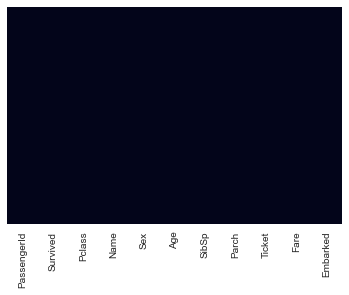

In [23]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
# Droping columns which is no use 

df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
# Seprating independent variable and dependent variable

x = df.drop("Survived",axis=1)
y = df["Survived"]

In [32]:
# Applying One Hot Encoder  for Embarked and Sex columns to chnage the categorical data into discrete variable

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("encoder" , 
                   OneHotEncoder(),
                   ["Sex","Embarked"])], remainder="passthrough")

x = np.array(ct.fit_transform(x))

In [37]:
x[:3]

array([[ 0.    ,  1.    ,  0.    ,  0.    ,  1.    ,  3.    , 22.    ,
         1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    , 38.    ,
         1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    ,  0.    ,  1.    ,  3.    , 26.    ,
         0.    ,  0.    ,  7.925 ]])

In [38]:
# Applying train_test_split on x y  variables

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(x,
                                             y,
                                             test_size=0.25,
                                             random_state=1)

In [39]:
# Default Paramters


from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

from sklearn.neighbors import KNeighborsClassifier
knn  = KNeighborsClassifier(n_neighbors=4)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.svm import SVC
svm = SVC()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [44]:
def classifiers(model):
    model.fit(Xtrain,ytrain)
    ypred = model.predict(Xtest)
    
    print(f"Accuracy_Score:- {accuracy_score(ytest,ypred)}\n\n{confusion_matrix(ytest,ypred)}\n{classification_report(ytest,ypred)}")
    return model

In [45]:
classifiers(knn)

Accuracy_Score:- 0.7085201793721974

[[117  21]
 [ 44  41]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       138
           1       0.66      0.48      0.56        85

    accuracy                           0.71       223
   macro avg       0.69      0.67      0.67       223
weighted avg       0.70      0.71      0.70       223



KNeighborsClassifier(n_neighbors=4)

In [67]:
# Using n_neighbors 
for improving the accuracy

accuracy = []
n = list(range(1,30))

for i in n:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(Xtrain,ytrain)
        ypred = knn.predict(Xtest)
        
        ac = accuracy_score(ytest,ypred)
        accuracy.append(ac)

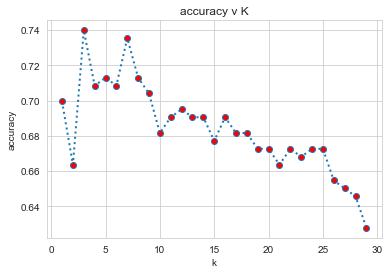

In [68]:
plt.plot(n,accuracy,ls=":",lw=2,marker="o",markerfacecolor="red")
plt.title("accuracy v K")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [71]:
knn = KNeighborsClassifier(n_neighbors=3)
classifiers(knn)

Accuracy_Score:- 0.7399103139013453

[[110  28]
 [ 30  55]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       138
           1       0.66      0.65      0.65        85

    accuracy                           0.74       223
   macro avg       0.72      0.72      0.72       223
weighted avg       0.74      0.74      0.74       223



KNeighborsClassifier(n_neighbors=3)

In [59]:
classifiers(lr)

Accuracy_Score:- 0.8430493273542601

[[119  19]
 [ 16  69]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       138
           1       0.78      0.81      0.80        85

    accuracy                           0.84       223
   macro avg       0.83      0.84      0.83       223
weighted avg       0.84      0.84      0.84       223



LogisticRegression()

In [48]:
classifiers(svm)

Accuracy_Score:- 0.6502242152466368

[[113  25]
 [ 53  32]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       138
           1       0.56      0.38      0.45        85

    accuracy                           0.65       223
   macro avg       0.62      0.60      0.60       223
weighted avg       0.64      0.65      0.63       223



SVC()

In [49]:
classifiers(dt)

Accuracy_Score:- 0.7937219730941704

[[115  23]
 [ 23  62]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       138
           1       0.73      0.73      0.73        85

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



DecisionTreeClassifier()

In [50]:
classifiers(rf)

Accuracy_Score:- 0.8251121076233184

[[119  19]
 [ 20  65]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       138
           1       0.77      0.76      0.77        85

    accuracy                           0.83       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223



RandomForestClassifier()

### Conclusion

. BEST SCORES 
-  LOGISTIC REGRESSION CLASSIFIER HAVE **84%** OF ACCURACY.
-  RANDOM FOREST CLASSIFIER HAVE **83%** OF ACCURACY.
-  DECISION TREE CLASSIFIER HAVE **79%** OF ACCURACY.
-  K-NEAREST NEIGHBORS HAVE **74%** OF ACCURACY.
-  SUPPORT VECTOR CLASSIFIER HAVE **65%** OF ACCURACY.

- Default Logisitc Regression is performing well because the dataset is well linearly seprable and the datapoints are not overlapping.
- The Dataset is also small not much samples are present.
- We can improve the Logistic Regression accuracy and also decrease the FN values by optimising thresshold values